#####
https://github.com/vishwakalyanaraman/MalariaDetection/blob/master/Malaria_Detection_Final.ipynb
#####


Malaria Detection

This journal is based on the National Institue of Health's (NIH) offical Malaria dataset:
https://ceb.nlm.nih.gov/repositories/malaria-datasets/. 
This dataset contains 27,558 pictures of both contaminated and healthy cells. We found this dataset on Kaggle, where we chose to use this one to create an algorithm that can detect healthy cells from contaminated ones.

Step by step (HOML, chapter 2):
- Look at the big pictures
- Get the data
- Create a test set
- Discover and visualize the data to gain insight
- Prepare the data for machine learning algorithms
- Select and train a model
- Fine-tune your model
- Launch, monitor and maintain your system

In [1]:
# Imports and from
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import *

from keras.utils import np_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image

#For GPU cluster
from libitmal import kernelfuns as itmalkernelfuns
itmalkernelfuns.EnableGPU()
print('Ok')

Using TensorFlow backend.


Ok


In [2]:
# Downloading and extracting. 
# Only on first run_
!wget = https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
!unzip cell_images.zip

# Assigning data path:
parasitized_data = os.listdir('/Users/oscarp/Documents/Malaria_J3/cell_images/Parasitized')
uninfected_data = os.listdir('/Users/oscarp/Documents/Malaria_J3/cell_images/Uninfected')

/bin/sh: wget: command not found
unzip:  cannot find or open cell_images.zip, cell_images.zip.zip or cell_images.zip.ZIP.


To better understand the difference between the .png images of the infected and the healthy cells, we will plot some samples below:

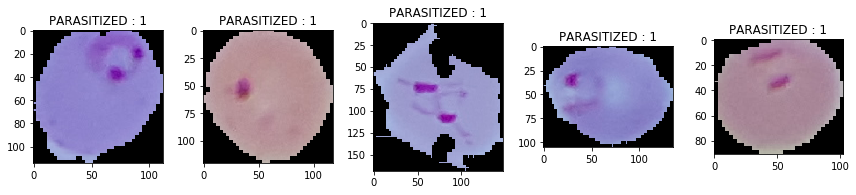

In [3]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/Users/oscarp/Documents/Malaria_J3/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

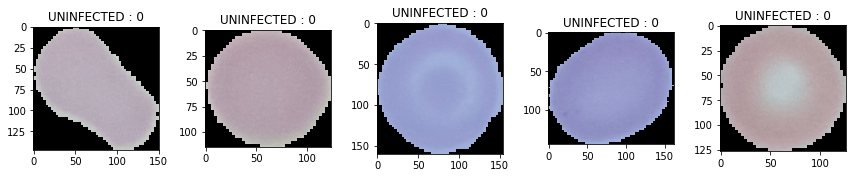

In [4]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/Users/oscarp/Documents/Malaria_J3/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

Looking at the sample plots above, it is clear to see, that the images dont scale the same way. this could lead to issues. To fix this, we proceed to resizing the images the exact same way:

In [5]:
# REFACTOR ALL OF THIS SECTION
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/Users/oscarp/Documents/Malaria_J3/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/Users/oscarp/Documents/Malaria_J3/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None 


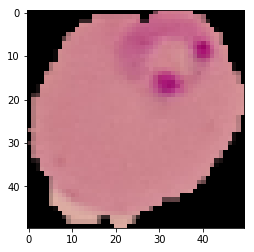

In [6]:
# Plotting data:
# REFACTOR ALL OF THIS
plt.imshow(data[0])
plt.show()

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
# Splitting into test data:
# FIND EXPLAINATIONA AND REFACTOR

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)



In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
# REFACTOR AND EXPLAIN
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

In [ ]:
#BUILDING CNN MODEL without data augmentation
#REFACTOR THIS

import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [ ]:
# Instantiate model
# Refactor this

height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

In [ ]:
#compile the model
#Refactor this
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#Refactor this
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

In [ ]:
#REFACTOR
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [ ]:
#Refactor
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

In [ ]:
#Refactor
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

27558 images isnt alot of data to train a model, so data augmentation might help

In [ ]:
#Refactor
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)


In [ ]:
#refactor

#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [ ]:
#Refactor

#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [ ]:
#Refactor
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

In [ ]:
#refactor
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [ ]:
#Refactor
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')